# pandas 进阶修炼 ｜早起Python
<br>

**本习题由公众号【早起Python & 可视化图鉴】 原创，转载及其他形式合作请与我们联系（微信号`sshs321`)，未经授权严禁搬运及二次创作，侵权必究！**



本习题基于 `pandas` 版本 `1.1.3`，所有内容应当在 `Jupyter Notebook` 中执行以获得最佳效果。


不同版本之间写法可能会有少许不同，如若碰到此情况，你应该学会如何自行检索解决。

## 7 - 金融数据与时间处理



<br>

**<font color = '#5172F0'><font size=3.5>必读👇👇👇**</font>
    
 
有关于 pandas 的常用操作，在前面几个章节已经基本介绍完毕。
    
但是在利用 pandas 进行数据分析时，一个很重要的操作就是与带有时间属性的数据进行交互。
    
并且常常与股票、基金、数字货币等数据相关。
    
因此，本章是一个专题练习，将介绍
- pandas操作时间
- 股票数据分析
- k线图制作



## 初始化

<br>

该 `Notebook` 版本为**习题+答案版**


请执行下方单元格以初始化读取本节习题的答案

执行完毕后，你可以使用 `ans(1)` 来查看第 1 题的参考解答，其余习题类似。

注意：所有答案并非固定（唯一），我提供的答案仅供参考（并非推荐答案或者最优解）

如果发现任何错误或者你有更好的解答，可以微信搜索公众号「早起Python」提交以获得奖励！


In [1]:
import sys
sys.path.append('../document/')
from init import initialize, ans
res = initialize("../document/answer-8.txt")

***************正在初始化***************
*************读取到配置文件*************
***************初始化成功***************


## 7-1 pandas中的时间操作

### 1 - 时间生成｜当前时间

使用 pandas 获取当前时间


In [ ]:
pd.Timestamp('now')

### 2 - 时间生成｜指定范围

使用 pandas 按天生成 2021年1月1日 至 2021年9月1日的全部日期

In [ ]:
pd.date_range('1/1/2021','9/11/2021')

### 3 - 时间生成｜指定长度

使用 pandas 从 2021年1月1日开始，按天生成 10 天日期

In [ ]:
pd.date_range("2021-01-01", periods=10)

### 4 - 时间生成｜指定频率

使用 pandas 从 2021年1月1日开始，按周生成 7 周日期

In [ ]:
pd.date_range("2021-01-01", periods=7, freq="W")

### 5 - 时间生成｜特殊规律

使用 pandas 按天生成 2021年1月1日 至 2021年9月1日的全部**工作日**日期

In [ ]:
pd.bdate_range(start='1/1/2021', end='9/1/2021')

### 6 - 时间计算｜时间差（天）

使用 pandas 计算 2021年2月14日 距离今天相差多少天

In [ ]:
(pd.Timestamp('now') - pd.to_datetime('2021-02-14')).days

### 7 - 时间计算｜时间差（小时）

使用 pandas 计算 2021年9月1日13点14分 距离今天相差多少小时

In [205]:
import numpy as np
(pd.Timestamp('now') - pd.to_datetime('2021-09-01 13:14:00'))/np.timedelta64(1, 'h')

### 8 - 时间运算

将第一题得到的时间减去一天，并格式化为 xx年xx月xx日 xx时xx分xx秒

In [ ]:
(pd.Timestamp('now') - pd.to_timedelta('1 day'))

### 9 - 时间格式化

将上一题的结果式化为 xx年xx月xx日-xx时xx分xx秒

In [ ]:
(pd.Timestamp('now') - pd.to_timedelta('1 day')).strftime("%Y年%m月%d日-%H时%M分%S秒")

## 7-2 股票数据分析

### 10 - 加载数据

本小节的数据将通过 [akshare](https://www.akshare.xyz/data/stock/stock.html#id8) 获取

如果你的电脑上未安装 akshare，可以执行下方代码进行安装

In [ ]:
! pip install akshare

In [1]:
import pandas as pd
import akshare as ak

如果任何原因安装、导入失败，可以取消下方代码的注释，从本地读取数据

In [2]:
# 日线
df1 = ak.stock_zh_a_hist(symbol="000001", period="daily", start_date="20170101", end_date='20210914', adjust="qfq")
# df1 = pd.read_csv("000001_daily.csv")
# 5min
df2 = ak.stock_zh_a_hist_min_em(symbol="000001", period='5', adjust='qfq', start_date="2021-08-01 09:32:00", end_date="2021-09-14 09:32:00")
# df2 = pd.read_csv("000001_5min.csv")

### 11 - 查看数据类型

查看 df1 各列的数据类型

In [ ]:
df1.info()

### 12 - 时间类型转换

将 df1 和 df2 的 日期 列转换为 pandas 支持的时间格式

In [76]:
df1['日期'] = pd.to_datetime(df1['日期'])
df2['时间'] = pd.to_datetime(df2['时间'])
# df1['日期'] = df1['日期'].astype('datetime64[ns]')

### 13 - 日期筛选｜区间

筛选出 df2 时间在 `2021-08-03 09:35:00` 与 `2021-08-04 15:00:00` 之间的数据

In [ ]:
df2[(df2['时间'] > '2021-08-03 09:35:00') & (df['时间'] < '2021-08-04 15:00:00')]

### 14 - 日期筛选｜指定

筛选 df2 时间为 2021-08-03 的全部数据

In [ ]:
df2.set_index('时间').truncate(after=pd.Timestamp('2021-08-04'))

### 15 - 金融计算｜涨跌额

`df1` 新增一列 涨跌，计算前后两日收盘价之差

注意：虽然我们的df1包含涨跌额列，但是这个操作很常用，所以练习一下

In [213]:
df1['涨跌']  = df1.收盘.diff()

### 17 - 金融计算｜涨跌幅

`df1` 新增一列 涨跌变化率，计算前后两日收盘价之差的变化率

注意：虽然我们的df1包含涨跌幅列，但是这个操作很常用，所以练习一下，结果可以用于验证

In [252]:
df1['涨跌变化率'] = (df1.收盘.pct_change()).apply(lambda x: format(x, '.2%'))

### 18 - 金融计算｜移动均值

计算收盘价的5日移动均线

In [ ]:
df1.收盘.rolling(window=5).mean()

### 19 - 金融计算｜移动均值（可视化）

计算并绘制收盘价的5日移动均线

In [ ]:
df1.收盘.rolling(window=5).mean().plot()

### 20 - 金融计算｜移动均值（可视化）

同时计算并绘制 df1 的收盘价、5日均线、20日均线

In [ ]:
df1.set_index("日期")['收盘'].plot()
df1.set_index("日期")['收盘'].rolling(5).mean().plot()
df1.set_index("日期")['收盘'].rolling(20).mean().plot()

### 21 - 金融计算｜指数移动平均值（EMA）

根据 df1 计算 EMA20

In [307]:
df1['EMA20'] = df1['收盘'].ewm(span=20,min_periods=0,adjust=False,ignore_na=False).mean()

### 22 - 金融计算｜MACD

计算 df1 的 MACD 指标

In [309]:
exp1 = df1['收盘'].ewm(span=12, adjust=False).mean()
exp2 = df1['收盘'].ewm(span=26, adjust=False).mean()
df1['MACD'] = exp1 - exp2
df1['Signal line'] = df1['MACD'].ewm(span=9, adjust=False).mean()

### 23 - 金融计算｜布林指标

计算并绘制布林指标，计算方法参考[百度百科](https://baike.baidu.com/item/%E5%B8%83%E6%9E%97%E7%BA%BF%E6%8C%87%E6%A0%87/3325894?fromtitle=%E5%B8%83%E6%9E%97%E6%8C%87%E6%A0%87&fromid=258891&fr=aladdin)


pandas120 80题

In [266]:
df1['former 30 days rolling Close mean'] = df1['收盘'].rolling(20).mean()
df1['upper bound'] = df1['former 30 days rolling Close mean'] + \
    2*df1['收盘'].rolling(20).std()  # 在这里我们取20天内的标准差
df1['lower bound'] = df1['former 30 days rolling Close mean'] - \
    2*df1['收盘'].rolling(20).std()

import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Songti SC'] #设置中文，如果本句代码导致失效，可以点击https://mp.weixin.qq.com/s/WKOGvQP-6QUAP00ZXjhweg

df1.set_index("日期")[['收盘', 'former 30 days rolling Close mean','upper bound','lower bound' ]].plot(figsize=(16, 6))

plt.show()

### 24 - 日期移动｜值

将 df1 的索引设置为日期，将 df1 数据向后移动一天

In [ ]:
df1.set_index('日期').shift(1)

### 25 - 日期移动｜索引

将 df1 的索引设置为日期，并将全部日期向后移动一天

In [ ]:
import datetime
df1.set_index('日期').shift(freq=datetime.timedelta(1))

### 26 - 日期重采样｜日 -> 周

按周对 df1 进行重采样，保留每周最后一个数据

In [ ]:
df1.set_index('日期').resample('W').last()

### 27 - 日期重采样｜日 -> 月

按月对 df1 进行重采样，保留每月最后一个数据

In [ ]:
df1.set_index('日期').resample('M').last()

### 28 - 日期重采样｜分钟 -> 日

按日对 df2 进行重采样，保留每天最后一个数据

In [ ]:
df2.set_index('时间').resample('D').last()

### 29 - 日期重采样｜低频 -> 高频

将 df2 的 5分钟 数据改为 3分钟，缺失数据向前填充

In [ ]:
df_3min = df2.set_index('时间').resample('3min').last()
df_3min.ffill()

## 7-3 K线图

<br>

**<font color = '#5172F0'><font size=3.5>必读👇👇👇**</font>

在 Python 中绘制k线图有很多方法，例如可以直接用 matplotlib 进行绘制。

本习题将基于一个简单易上手的库 `mplfinance` 进行展开。

如果未安装 mplfinance 需要先执行下面的代码进行安装！

In [ ]:
! pip install mplfinance

安装后执行下面的代码导入

In [60]:
import mplfinance as mpf

使用 mplfinance 有固定的格式!

数据必须是`Pandas DataFrame`格式，必须包含开盘价、最高价、最低价和收盘价，需要使用`DatetimeIndex`作为索引

为了方便大家练习，第一个K线图我将引导大家制作！

首先就是将数据处理为它指定的形状👇

### 30 - 数据处理｜选择列

<br>

筛选 `df1` 中`'日期','开盘','最高','最低','收盘','成交量'`几列，并命名为新数据框 `df_new`

In [3]:
df_new = df1[['日期','开盘','最高','最低','收盘','成交量']]

### 31 - 数据处理｜修改列名

<br>

将 df_new 的列名修改为 `'Date','Open','High','Low','Close','Volume'`

In [4]:
df_new.columns = ['Date','Open','High','Low','Close','Volume']

### 32 - 数据处理｜修改索引

<br>

将 df_new 的索引列修改为 Date 列

In [5]:
df_new.set_index(["Date"], inplace=True)

### 33 - 制作K线图｜日线

根据 df_new 绘制日线级K线

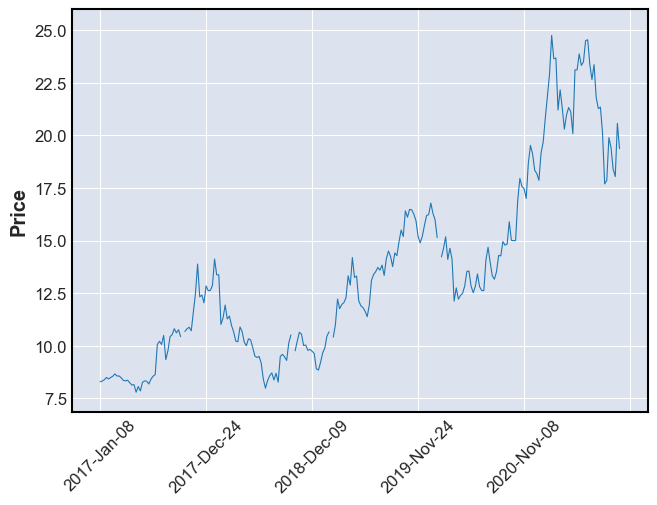

In [128]:
mpf.plot(df_new, type='line')

### 34 - 制作K线图｜添加移动均线

在上一题的基础上，添加5日、10日、15日移动均线

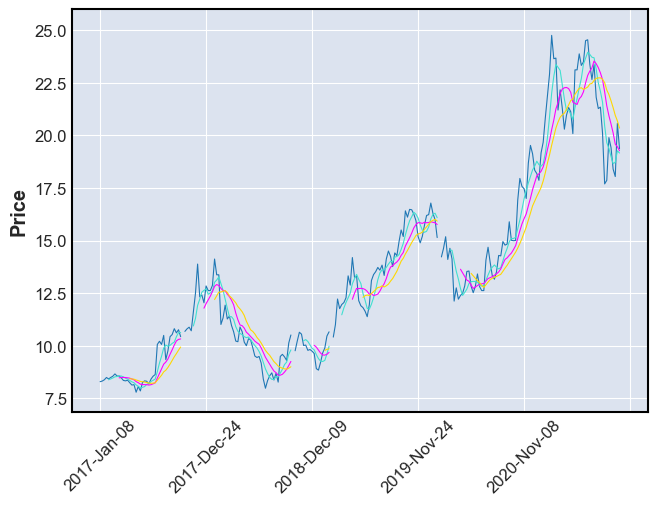

In [130]:
mpf.plot(df_new, type='line',mav=(5,10,15))

### 35 - 制作K线图｜添加成交量

在上一题的基础上，添加成交量

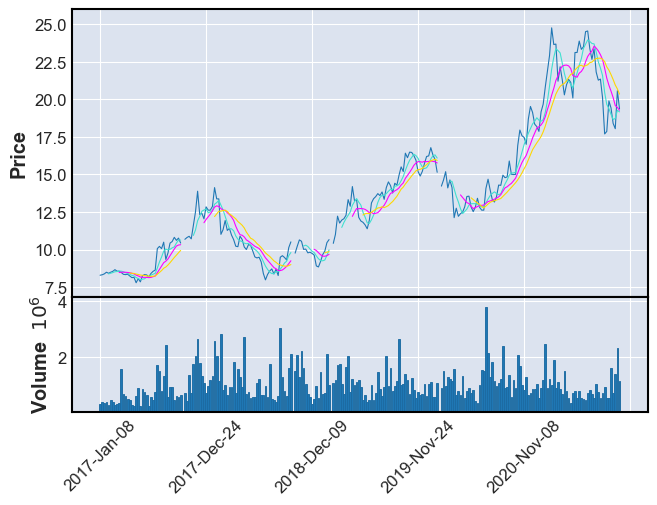

In [131]:
mpf.plot(df_new, type='line',mav=(5,10,15), volume=True)

### 36 - 制作K线图｜周线

对 df1 进行重采样，制作周线级K线

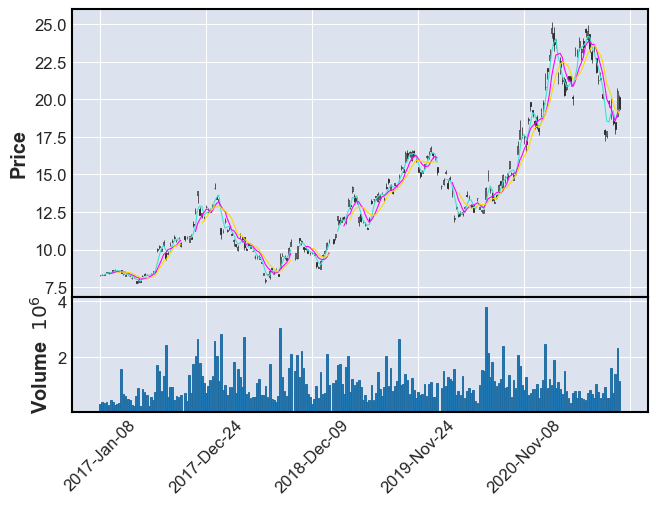

In [127]:
df_new = df1.set_index('日期').resample('W').last()
df_new = df_new[['开盘','最高','最低','收盘','成交量']]
df_new.columns = ['Open','High','Low','Close','Volume']
mpf.plot(df_new, type='candle',mav=(5,10,15), volume=True)

### 37 - 制作K线图｜蜡烛图

使用 df2 数据，筛选出 8月3日 的数据，制作蜡烛图

In [133]:
df_new = df2[(df2['时间'] > '2021-08-03 09:35:00') & (df['时间'] < '2021-08-03 15:00:00')]
df_new = df_new[['时间','开盘','最高','最低','收盘','成交量']]
df_new.columns = ['Date','Open','High','Low','Close','Volume']
df_new.set_index(["Date"], inplace=True)

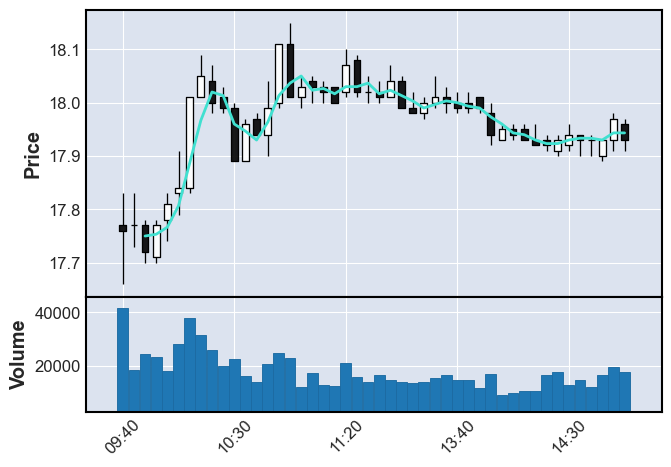

In [134]:
mpf.plot(df_new, type='candle',mav=(3,6,9), volume=True)

### 38 - 制作K线图｜展示非交易时间

<br>

使用 df2 数据，筛选 8月3日-8月4日的数据，制作蜡烛图并展示非交易时间区间

In [135]:
df_new = df2[(df2['时间'] > '2021-08-03 9:00:00') & (df['时间'] < '2021-08-04 15:00:00')]
df_new = df_new[['时间','开盘','最高','最低','收盘','成交量']]
df_new.columns = ['Date','Open','High','Low','Close','Volume']
df_new.set_index(["Date"], inplace=True)

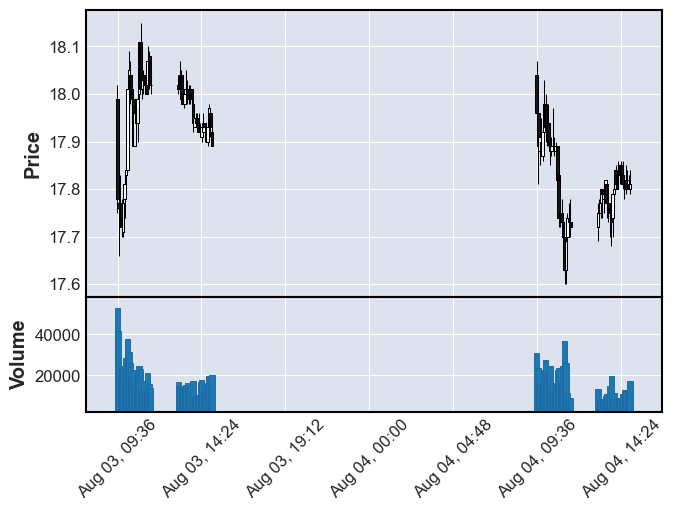

In [136]:
mpf.plot(df_new,type='candle',show_nontrading=True, volume=True)